In [79]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
placebo = [54, 51, 58, 44, 55, 52, 42, 47, 58, 46]
drug = [54, 73, 53, 70, 73, 68, 52, 65, 65]

In [4]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()

In [5]:
df1["effects"] = placebo

In [6]:
df1["label"] = "P"

In [7]:
df2["effects"] = drug
df2["label"] = "D"

In [8]:
df3 = pd.concat([df1,df2]).reset_index(drop=True)

In [45]:
df3.head()

,effects,label
0,55,P
1,54,P
2,65,P
3,47,P
4,54,P


In [10]:
df3.groupby("label").mean()

,effects
label,
D,63.666667
P,50.700000


In [11]:
means = df3.groupby("label").mean().values
means

array([[63.66666667],
       [50.7       ]])

In [12]:
diff_mean = means[0][0] - means[1][0]

In [41]:
diff_mean = np.zeros(10000, dtype = float)

In [42]:
for i in range(10000):
    df3["effects"]=np.random.permutation(df3.effects.values)
    means = df3.groupby("label").mean().values
    diff_mean[i] = means[0][0] - means[1][0]

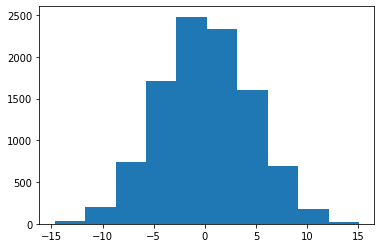

In [67]:
plt.hist(diff_mean)
#plt.axvline(x = 0, c='r',label ="zero")
plt.show()

## If we randomly shuffle labels, the mean advantage, over A LOT of simulations, will converge to 0

In [107]:
placebo = [54, 51, 58, 44, 55, 52, 42, 47, 58, 46]
drug = [54, 73, 53, 70, 73, 68, 52, 65, 65]
mean_adv = np.zeros(10000)
for i in range(10000):
    boot_index_placebo = np.random.choice(placebo, size=len(placebo))
    boot_index_drug = np.random.choice(drug, size=len(drug))
    mean_adv[i] = boot_index_drug.mean() - boot_index_placebo.mean()

fiveperc = int(np.percentile(mean_adv, 5))
ninetyfiveperc = int(np.percentile(mean_adv, 95))
mean = int(mean_adv.mean())

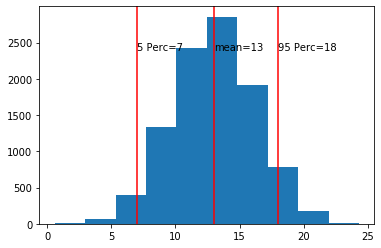

In [114]:
##### plt.hist(mean_adv)
plt.hist(mean_adv)
plt.axvline(x = fiveperc, c='r')
plt.axvline(x = ninetyfiveperc, c='r',label ="zero")
plt.axvline(x = mean, c='r',label ="zero")
plt.text(mean,2400, "mean={}".format(mean))
plt.text(fiveperc,2400, "5 Perc={}".format(fiveperc))
plt.text(ninetyfiveperc,2400, "95 Perc={}".format(ninetyfiveperc))
plt.show()

### 0 is not in the graph
### the mean advantage of drug over placebo varies between 7 and 18 ----> (5pcentile, 95pcentile)